# Classification on Wine Quality Dataset - Plots

## Logistic Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

filenames = ['no_preproc', 'StandardScaler', 'StandardScaler_PCA (d=9)', 'StandardScaler_PCA (d=5)']
titles = ['No preprocessing', 'StandardScaler', 'StandardScaler, PCA ($d=9$)', 'StandardScaler, PCA ($d=5$)']
fig, axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.tight_layout(pad=3)
fig.set_dpi(600)
for ax, prep, t in zip(axs.reshape(-1), filenames, titles):
    d1 = pd.read_csv(f'results/results_lr_{prep}.csv')
    d2 = pd.read_csv(f'results/results_qlr_{prep}.csv')

    d1 = d1[d1['Prior'] == 0.5][['l','Min DCF']]
    d2 = d2[d2['Prior'] == 0.5][['l','Min DCF']]

    ax.set_ylim([0.25, 0.45])
    ax.title.set_text(t)
    ax.set_xlabel('$\lambda$', fontsize=12)
    ax.xaxis.set_label_coords(.5, -.05)
    ax.tick_params(axis='x', which='major', labelsize=12)
    ax.semilogx(d1['l'], d1['Min DCF'], label='LogReg',  linewidth=2.5)
    ax.semilogx(d2['l'], d2['Min DCF'], label='QuadLogReg',  linewidth=2.5)
    ax.legend()
plt.savefig('images/logreg_lambda.png')


KeyboardInterrupt



Error in callback <function flush_figures at 0x0000020E94C14700> (for post_execute):



KeyboardInterrupt



## GMM

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

filenames = ['no_preproc', 'StandardScaler', 'Gaussianizer']
titles = ['No preprocessing', 'StandardScaler', 'Gaussianizer']
fig, axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.tight_layout(pad=5)
fig.set_dpi(600)
fig.delaxes(axs[1][1])
for ax, prep, t in zip(axs.reshape(-1), filenames, titles):
    d = pd.read_csv(f'results/results_gmm_{prep}.csv')
    d = d[(d['Prior'] == 0.5) & (d['alpha'] == 1)][['Min DCF', 'n_components','tied','diag']]

    dF = d[(d['tied'] == False) & (d['diag'] == False)]
    dD = d[(d['tied'] == False) & (d['diag'] == True)]
    dT = d[(d['tied'] == True) & (d['diag'] == False)]
    dDT = d[(d['tied'] == True) & (d['diag'] == True)]

    ax.set_ylim([0.25, 0.45])
    ax.title.set_text(t)
    ax.set_xlabel('Number of components', fontsize=12)
    ax.xaxis.set_label_coords(0.5, -0.1)
    ax.tick_params(axis='x', which='major', labelsize=12)

    ax.plot(dF['n_components'], dF['Min DCF'], label='Full Cov',  linewidth=2.5)
    ax.plot(dD['n_components'], dD['Min DCF'], label='Diag Cov',  linewidth=2.5)
    ax.plot(dT['n_components'], dT['Min DCF'], label='Tied Cov',  linewidth=2.5)
    ax.plot(dDT['n_components'], dDT['Min DCF'], label='Diag Tied Cov',  linewidth=2.5)

    ax.legend()

plt.savefig('images/gmm_c.png')

## SVM - C

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

filenames = ['no_preproc', 'StandardScaler', 'Gaussianizer']
titles = ['No preprocessing', 'StandardScaler', 'Gaussianizer']
fig, axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.tight_layout(pad=5)
fig.set_dpi(600)
fig.delaxes(axs[1][1])
for ax, prep, t in zip(axs.reshape(-1), filenames, titles):
    d1 = pd.read_csv(f'results/results_svm_{prep}.csv')
    d2 = pd.read_csv(f'results/results_svm_rbf_{prep}.csv')

    dlin = d1[(d1['Prior'] == 0.5) & (d1['kernel'] == 'linear')][['Min DCF', 'C']]
    dpoly = d1[(d1['Prior'] == 0.5) & (d1['kernel'] == 'poly')][['Min DCF', 'C']]
    drbf = d2[(d2['Prior'] == 0.5) & (d2['gamma'] == 0.1353352832366127)][['Min DCF', 'C']]

    ax.title.set_text(t)
    ax.set_xlabel('C', fontsize=12)
    ax.xaxis.set_label_coords(0.5, -0.1)
    ax.tick_params(axis='x', which='major', labelsize=12)

    ax.semilogx(dlin['C'], dlin['Min DCF'], label='Linear',  linewidth=2.5)
    ax.semilogx(dpoly['C'], dpoly['Min DCF'], label='Polynomial',  linewidth=2.5)
    ax.semilogx(drbf['C'], drbf['Min DCF'], label='RBF ($\log \gamma = -2$)',  linewidth=2.5)

    ax.legend()
plt.savefig('images/svc_c.png')

## SVM - Gamma

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd

filenames = ['no_preproc', 'StandardScaler', 'Gaussianizer']
titles = ['No preprocessing', 'StandardScaler', 'Gaussianizer']
fig, axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.tight_layout(pad=5)
fig.set_dpi(600)
fig.delaxes(axs[1][1])
for ax, prep, t in zip(axs.reshape(-1), filenames, titles):
    d = pd.read_csv(f'results/results_svm_rbf_{prep}.csv')

    dg1 = d[(d['Prior'] == 0.5) & (d['gamma'] == 0.3678794411714423)][['Min DCF', 'C']]
    dg2 = d[(d['Prior'] == 0.5) & (d['gamma'] == 0.1353352832366127)][['Min DCF', 'C']]
    dg3 = d[(d['Prior'] == 0.5) & (d['gamma'] == 0.0497870683678639)][['Min DCF', 'C']]

    ax.title.set_text(t)
    ax.set_xlabel('C (log scale)', fontsize=12)
    ax.xaxis.set_label_coords(0.5, -0.1)
    ax.tick_params(axis='x', which='major', labelsize=12)

    ax.semilogx(dg1['C'], dg1['Min DCF'], label='$\log \gamma = -1$',  linewidth=2.5)
    ax.semilogx(dg2['C'], dg2['Min DCF'], label='$\log \gamma = -2$',  linewidth=2.5)
    ax.semilogx(dg3['C'], dg3['Min DCF'], label='$\log \gamma = -3$',  linewidth=2.5)

    ax.legend()
plt.savefig('images/svc_g.png')

## DCF Curves - Uncalibrated vs Calibrated

In [ ]:
from tiblib.visualization import multiplot_dcf
import numpy as np
from tiblib import load_wine
print('Running...')
X_train, _, y_train, _ = load_wine()
scores = []
model_names = ['svm2', 'qlr1', 'gmm1']
plot_names = ['SVM ($C = 1$, $ \log \gamma =-1 $) with StandardScaler',
              'QLR with StandardScaler',
              'GMM Full Covariance ($C = 8$) with StandardScaler']
for n in model_names:
    scores.append(np.load(f'results/scores_{n}.npy').reshape(-1,1))
scores = np.concatenate(scores, axis=1)
multiplot_dcf(scores, y_train, plot_names=plot_names, filename=f'dcf_best_uncal', save=True)

In [ ]:
from tiblib.visualization import multiplot_dcf
import numpy as np
from tiblib import load_wine
print('Running...')
X_train, _, y_train, _ = load_wine()
scores = []
model_names = ['svm2', 'qlr1', 'gmm1']
plot_names = ['SVM ($C = 1$, $ \log \gamma =-1 $) with StandardScaler',
              'QLR with StandardScaler',
              'GMM Full Covariance ($C = 8$) with StandardScaler']
for n in model_names:
    scores.append(np.load(f'results/cal_scores_{n}.npy').reshape(-1,1))
scores = np.concatenate(scores, axis=1)
multiplot_dcf(scores, y_train, plot_names=plot_names, filename=f'dcf_best_cal', save=True)

## DCF Curves - Fusions

In [ ]:
from tiblib.visualization import multiplot_dcf
import numpy as np
from tiblib import load_wine
print('Running...')
X_train, _, y_train, _ = load_wine()
scores = []
model_names = ['svm2_qlr1_gmm1', 'svm2_qlr1', 'svm2_gmm1', 'qlr1_gmm1']
plot_names = ['QLR + SVM + GMM',
              'QLR + SVM',
              'SVM + GMM',
              'QLR + GMM']
for n in model_names:
    scores.append(np.load(f'results/fusion_scores_{n}.npy').reshape(-1,1))
scores = np.concatenate(scores, axis=1)
multiplot_dcf(scores, y_train, plot_names=plot_names, filename=f'dcf_fusion_cal', save=True)

## DCF Curves - Evaluation

In [ ]:
from tiblib.visualization import multiplot_dcf
import numpy as np
print('Running...')
_, _, _, y_test = load_wine()

scores = []
model_names = ['QLR', 'SVM', 'GMM', 'fusion_QLR_SVM_GMM']
plot_names = ['QLR', 'SVM', 'GMM', 'QLR + SVM + GMM']
for n in model_names:
    scores.append(np.load(f'results/eval_{n}.npy').reshape(-1,1))
scores = np.concatenate(scores, axis=1)
multiplot_dcf(scores, y_test, plot_names=plot_names, filename=f'dcf_eval_uncal', save=True)

In [ ]:
from tiblib.visualization import multiplot_dcf
import numpy as np
print('Running...')
_, _, _, y_test = load_wine()

scores = []
model_names = ['QLR', 'SVM', 'GMM', 'fusion_QLR_SVM_GMM']
plot_names = ['QLR', 'SVM', 'GMM', 'QLR + SVM + GMM']
for n in model_names:
    scores.append(np.load(f'results/eval_cal_{n}.npy').reshape(-1,1))
scores = np.concatenate(scores, axis=1)
multiplot_dcf(scores, y_test, plot_names=plot_names, filename=f'dcf_eval_cal', save=True)


## ROC Curve - Evaluation

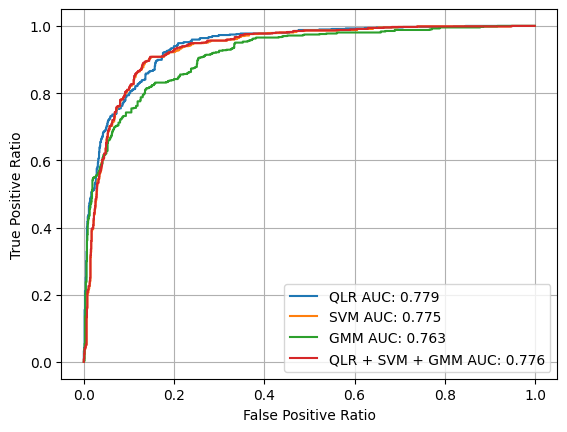

In [1]:
import numpy as np
from tiblib import load_wine
from tiblib.visualization import plot_roc

_, _, _, y_test = load_wine()

scores = []
model_names = ['QLR', 'SVM', 'GMM', 'fusion_QLR_SVM_GMM']
plot_names = ['QLR', 'SVM', 'GMM', 'QLR + SVM + GMM']
for n in model_names:
    scores.append(np.load(f'results/eval_cal_{n}.npy').reshape(-1,1))
scores = np.concatenate(scores, axis=1)
plot_roc(scores, y_test, plot_names, 'evaluation_roc')